In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure

In [2]:
# Load the dataframe
df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv', delimiter=',')
#df.head(1)

## Describe the Data

In [3]:
# Set a color list to be used later
colors = ['brown', 'orange', 'olive', 'green', 'blue', 'cyan', 'purple', 'pink', 'gray', 'salmon', 'violet', 'crimson']
original_len = len(df)
print('The original dataset is made of %d entries.' %(original_len))

The original dataset is made of 399918 entries.


Inspection Dates start from January 1, 2010. The restaurants that have not been inspected yet are given the date January 1,1900. Those will be removed from the datasets

In [4]:
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
df = df[df['INSPECTION DATE'] > '2009-12-31']
print('%d points had invalid dates.' %(original_len-len(df)))

1135 points had invalid dates.


In [5]:
print('The data set has %d different types of violation codes' %(len(df['VIOLATION CODE'].unique())))

The data set has 98 different types of violation codes


The 98 violations codes have been grouped into macro-catgories of similar nature and have all been given a name. The dictionary in the cell below shows which labels have been given to each code. The total number of new violation categories is 12. Restaurants that had no violations recorded were dropped from the dataset.

In [6]:
viol_dict = {'02A': 'Food Temperature',
 '02B': 'Food Temperature',
 '02C': 'Food Temperature',
 '02D': 'Food Temperature',
 '02E': 'Food Temperature',
 '02F': 'Allergies/Safety',
 '02G': 'Food Temperature',
 '02H': 'Food Temperature',
 '02I': 'Food Temperature',
 '02J': 'Food Temperature',
 '03A': 'Certification',
 '03B': 'Certification',
 '03C': 'Food Contamination',
 '03D': 'Food Contamination',
 '03E': 'Certification',
 '03F': 'Allergies/Safety',
 '03G': 'Food Contamination',
 '04A': 'Certification',
 '04B': 'Worker Cleanliness',
 '04C': 'Worker Cleanliness',
 '04D': 'Worker Cleanliness',
 '04E': 'Hazardous Chemicals',
 '04F': 'Facility Cleanliness',
 '04G': 'Hazardous Chemicals',
 '04H': 'Food Contamination',
 '04I': 'Food Contamination',
 '04J': 'Allergies/Safety',
 '04K': 'Animals',
 '04L': 'Animals',
 '04M': 'Animals',
 '04N': 'Animals',
 '04O': 'Animals',
 '05A': 'Facility Cleanliness',
 '05B': 'Hazardous Chemicals',
 '05C': 'Facility Amenities',
 '05D': 'Facility Amenities',
 '05E': 'Facility Amenities',
 '05F': 'Facility Amenities',
 '05H': 'Facility Amenities',
 '05I': 'Allergies/Safety',
 '06A': 'Worker Cleanliness',
 '06B': 'Tobacco',
 '06C': 'Food Contamination',
 '06D': 'Food Contamination',
 '06E': 'Facility Cleanliness',
 '06F': 'Facility Cleanliness',
 '06G': 'Documentation',
 '06H': 'Documentation',
 '06I': 'Documentation',
 '07A': 'Other',
 '08A': 'Facility Cleanliness',
 '08B': 'Facility Cleanliness',
 '08C': 'Hazardous Chemicals',
 '09A': 'Food Contamination',
 '09B': 'Other',
 '09C': 'Facility Cleanliness',
 '10A': 'Facility Amenities',
 '10B': 'Facility Amenities',
 '10C': 'Facility Amenities',
 '10D': 'Facility Amenities',
 '10E': 'Facility Amenities',
 '10F': 'Facility Amenities',
 '10G': 'Facility Amenities',
 '10H': 'Facility Cleanliness',
 '10I': 'Facility Cleanliness',
 '10J': 'Other',
 '15E': 'Facility Cleanliness',
 '15H': 'Tobacco',
 '15I': 'Tobacco',
 '15J': 'Tobacco',
 '15K': 'Tobacco',
 '15L': 'Tobacco',
 '15S': 'Tobacco',
 '15T': 'Tobacco',
 '16A': 'Other',
 '16B': 'Documentation',
 '16C': 'Documentation',
 '16D': 'Documentation',
 '16E': 'Documentation',
 '16F': 'Documentation',
 '18B': 'Documentation',
 '18C': 'Certification',
 '18D': 'Certification',
 '18F': 'Certification',
 '20A': 'Allergies/Safety',
 '20B': 'Allergies/Safety',
 '20D': 'Allergies/Safety',
 '20E': 'Documentation',
 '20F': 'Documentation',
 '22A': 'Facility Amenities',
 '22B': 'Facility Amenities',
 '22C': 'Facility Amenities',
 '22E': 'Certification'}

In [7]:
df['VIOLATION TYPE'] = df['VIOLATION CODE'].map(viol_dict)
df[df['VIOLATION TYPE'] == ' '] == np.nan
df = df.dropna()

In [8]:
print('The dataset now has %d elements' %(len(df)))

The dataset now has 191636 elements


We now take a look at the types of cuisines and their most common violations. The datasethas 84 different types of cuisines. For this analysis we pick the most common types of restaurants. The value for threshold can be change to isolate the set of most common cuisines in NYC. 

In [9]:
cuisine_counts = {}
major_cuisines = []
threshold = 0.03 # Threshold to discriminate the presence of restaurants.
                # At the moment it selects cuisines that represent 97% of restaurants.
for i in df['CUISINE DESCRIPTION'].unique():
    cuisine_counts[i] = float(len(df[df['CUISINE DESCRIPTION']==i]))

major_cuisines = [i for i in cuisine_counts.keys() if cuisine_counts[i]/sum(cuisine_counts.values()) > threshold]

In [10]:
df = df[df['CUISINE DESCRIPTION'].isin(major_cuisines)]
print('The dataframe now is made of %d points' %(len(df)))

The dataframe now is made of 112604 points


## Violation criticality

The next step is to look at the flags each restaurant is given. We only keep the restaurants that have either a critical or non critical flag.

There are 59388 critical flags and 53216 non critical flags.


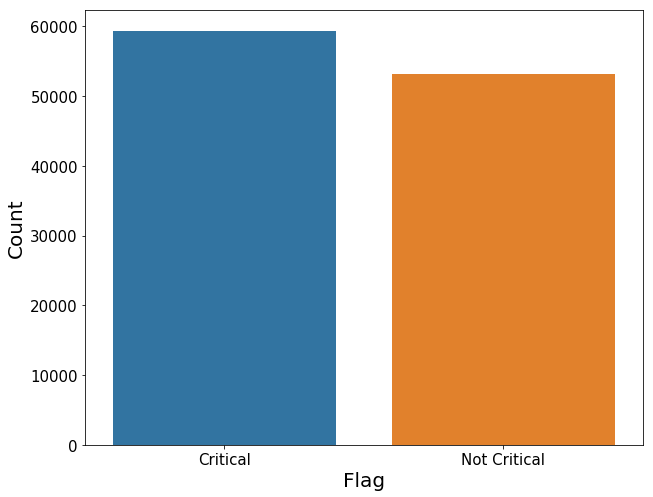

In [11]:
flags=df[df['CRITICAL FLAG'].isin(['Critical', 'Not Critical'])]
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(data=flags, x='CRITICAL FLAG')
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Flag', fontsize=20)
ax.tick_params(labelsize=15)
print('There are %d critical flags and %d non critical flags.' %(sum(flags['CRITICAL FLAG']=='Critical'), sum(flags['CRITICAL FLAG']=='Not Critical')))

The number of critical flags is higher than the number of non critical flags by 11.6%. We now want to see how the flags are distributed in each borough in NYC.

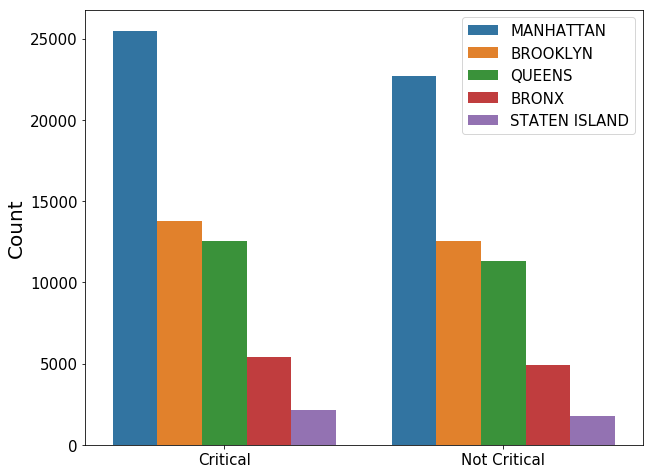

In [12]:
#flags.head()
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(data=flags, x='CRITICAL FLAG', hue='BORO', hue_order=flags['BORO'].value_counts().index)
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('')
ax.tick_params(labelsize=15)
ax = plt.legend(fontsize=15)

Manhattant is the borough with the most critical flags, but also the one with the higher number of restaurants inspected. It is interesting to notice how the proportion of critical to non critical flags is similar for each borough. To confirm this we then make a pie plot of the flags for each borough.

BROOKLYN has 13746 Critical Violations and 12530 Non Critical Violations.
STATEN ISLAND has 2165 Critical Violations and 1791 Non Critical Violations.
MANHATTAN has 25492 Critical Violations and 22693 Non Critical Violations.
BRONX has 5430 Critical Violations and 4886 Non Critical Violations.
QUEENS has 12555 Critical Violations and 11316 Non Critical Violations.


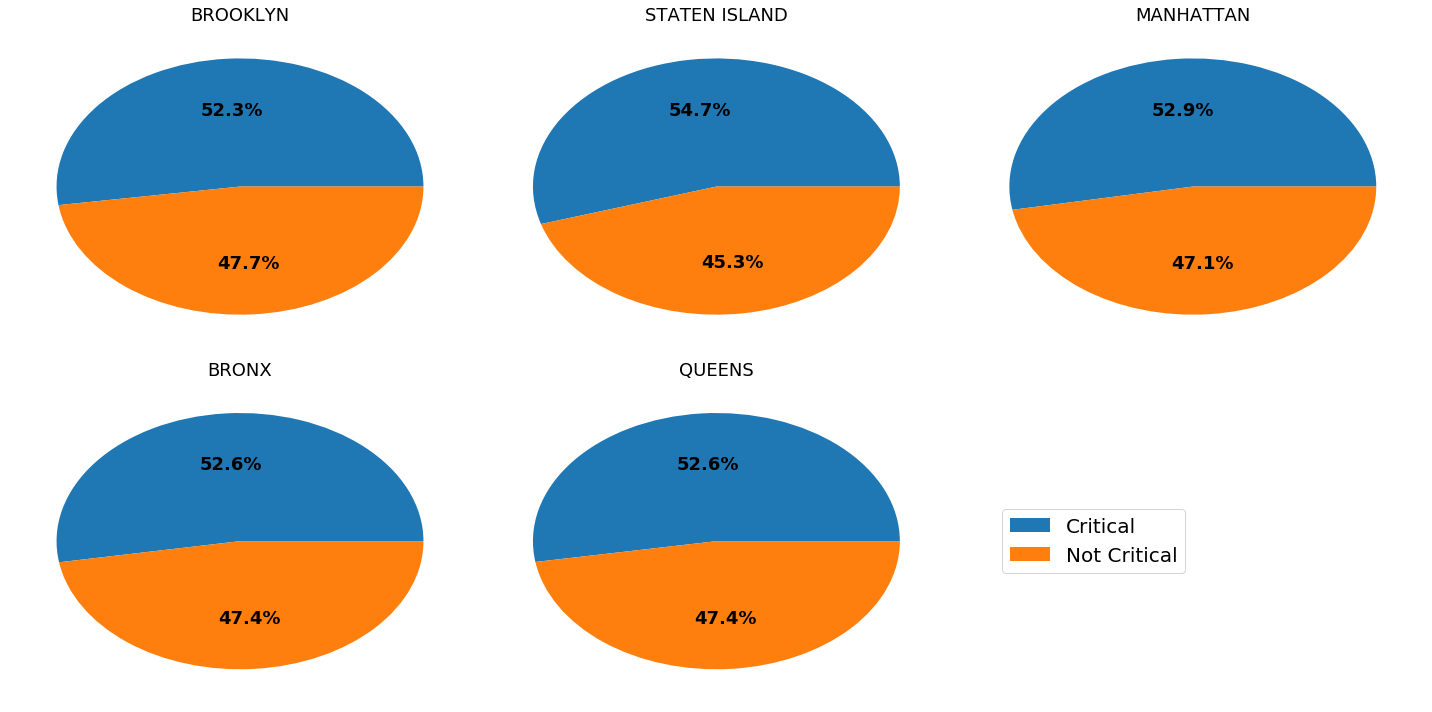

In [13]:
labels = ['Critical', 'Not Critical']
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

fig = plt.figure(figsize=(20,10))
graph = 1

for i in flags['BORO'].unique():
    criticalities = []
    flags_bor = flags[flags['BORO'] == i]
    criticalities = [len(flags_bor[flags_bor['CRITICAL FLAG']==l]) for l in flags['CRITICAL FLAG'].unique()]
    print('%s has %d Critical Violations and %d Non Critical Violations.' %(i, criticalities[0], criticalities[1]))
    ax = fig.add_subplot(2,3,graph)
    ax, text, autotext = plt.pie(x=criticalities, autopct=lambda pct: func(pct, criticalities))
    plt.title(i, fontsize=18)
    plt.setp(autotext, size=18, weight='bold')
    graph += 1
    plt.tight_layout()
        
plt.legend(ax, labels, bbox_to_anchor=(1.1,0.5), loc="center left", fontsize=20)
plt.show()

The plot above confirms our finding as there is no significant difference in the percentages of critical and non critical violations. We next look at the grades divided by borough.

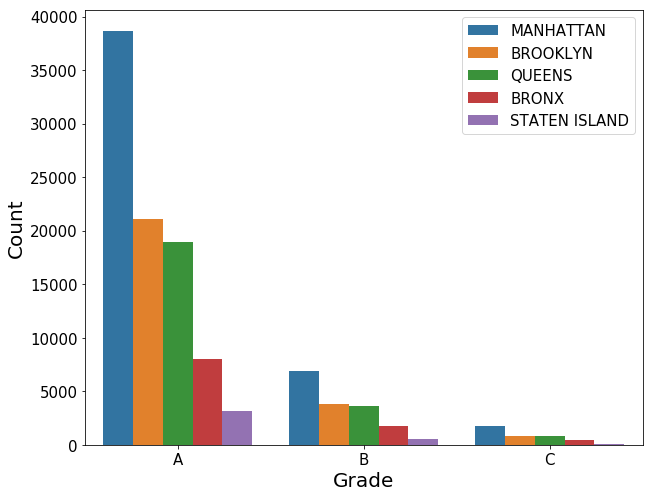

In [14]:
grades = df[df['GRADE'].isin(['A','B', 'C'])]
fig = plt.figure(figsize=(10,8))
#grades['GRADE'].value_counts()
ax = sns.countplot(x='GRADE', hue='BORO', data=grades, order=grades['GRADE'].value_counts().index, hue_order=grades['BORO'].value_counts().index)
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Grade', fontsize=20)
ax.tick_params(labelsize=15)
ax = plt.legend(fontsize=15)

Manhattan gets a much higher number of A grades than the other boroughs. Next we plotted the average scores by borough. Note in this case that a high score means a poorer performance. Some restaurants were given negative scores, these have been dropped from the dataset since it is not possible to achieve a negative grade. 

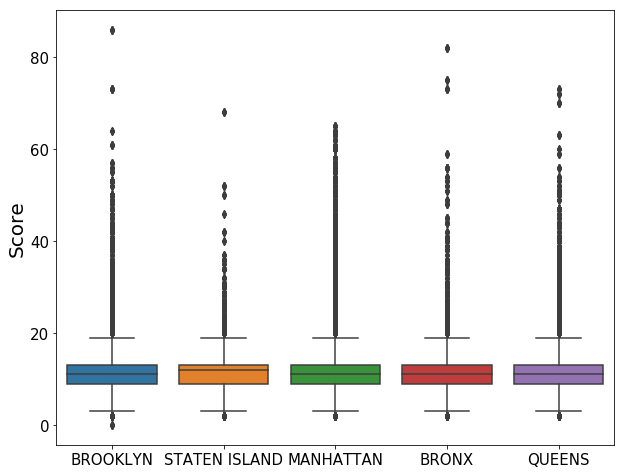

In [15]:
df['SCORE'].dropna()
df = df[df['SCORE'] >= 0]
boros = df[df['BORO'] != 'Missing']
boros = boros[boros['SCORE'] >= 0]
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(x='BORO', y='SCORE', data=boros)
ax.set_ylabel('Score', fontsize=20)
ax.set_xlabel('')
ax.tick_params(labelsize=15)

It strikes that, despite the higher number of restaurants located in Manhattan, their spreadness is not as great as for example Bronx and Brooklyn. There is however a more negative performance by restaurants in Staten Island. This is confirmed by its median (12 as opposed to 11 for the other boroughs). A one point difference however makes it difficult to clearly state that restaurants in Staten Island are worse than those in other areas. 

In [16]:
for elem in boros['BORO'].unique():
    print(elem, '\n',boros['SCORE'].loc[boros['BORO']==elem].describe())

BROOKLYN 
 count    26272.000000
mean        12.350982
std          7.019846
min          0.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         86.000000
Name: SCORE, dtype: float64
STATEN ISLAND 
 count    3956.000000
mean       12.678463
std         6.808469
min         2.000000
25%         9.000000
50%        12.000000
75%        13.000000
max        68.000000
Name: SCORE, dtype: float64
MANHATTAN 
 count    48175.000000
mean        12.570296
std          7.519717
min          2.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         65.000000
Name: SCORE, dtype: float64
BRONX 
 count    10316.000000
mean        12.684858
std          7.718926
min          2.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         82.000000
Name: SCORE, dtype: float64
QUEENS 
 count    23869.000000
mean        12.577527
std          7.244392
min          2.000000
25%          9.000000
50%         11.000000
75% 

## Violations by season

It would be interesting to look at the seasons when inspections happened to see if there is a variation in the violations with the season. We decided to do a season-month mapping according to the following sheme: Winter ->{December, January, February}, Spring -> {March, April, May}, Summer -> {June, July, August}, Fall -> {September, October, November}.

In [17]:
season_dict = {}
# Extact the month from each inspection date
df['MONTH']=pd.DatetimeIndex(df['INSPECTION DATE']).month

for month in range(1,13):
    if month > 2 and month < 6:
        season_dict[month] = 'Spring'
    elif month > 2 and month < 9:
        season_dict[month] = 'Summer'
    elif month > 2 and month < 12:
        season_dict[month] = 'Fall'
    else:
        season_dict[month] = 'Winter'

df['SEASON'] = df['MONTH'].map(season_dict)

Below are the boxplots of the scores divided by season.

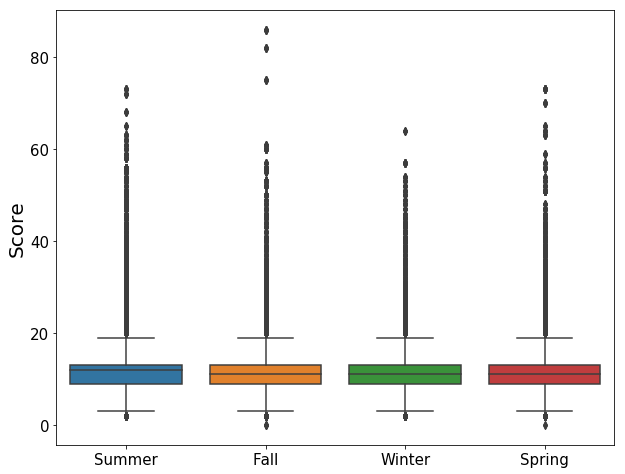

In [18]:
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(x='SEASON', y='SCORE', data=df)
ax.set_ylabel('Score', fontsize=20)
ax.set_xlabel('')
ax.tick_params(labelsize=15)

In [19]:
for elem in df['SEASON'].unique():
    print(elem, '\n',df['SCORE'].loc[df['SEASON']==elem].describe())

Summer 
 count    30710.000000
mean        13.338261
std          8.268946
min          2.000000
25%          9.000000
50%         12.000000
75%         13.000000
max         73.000000
Name: SCORE, dtype: float64
Fall 
 count    23523.000000
mean        12.842665
std          7.539750
min          0.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         86.000000
Name: SCORE, dtype: float64
Winter 
 count    26065.000000
mean        12.044811
std          6.474064
min          2.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         64.000000
Name: SCORE, dtype: float64
Spring 
 count    32290.000000
mean        11.942428
std          6.819226
min          0.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         73.000000
Name: SCORE, dtype: float64


From the data above it seems there is not a big difference in the scores throughout the seasons. In general Summer is the one showing the highest scores (poorer performance) while the highest grades have been recorded in the Fall. It is worth noticing that all seasons have their 75th percentile at 13 points.
The plot below shows the grades assigned in each season. The majority of A votes have been given in the spring while the lowest number has been given during Fall.It is advisable therefore to eat out at a restaurant in NYC in the Spring, and possibly avoid the Fall. 

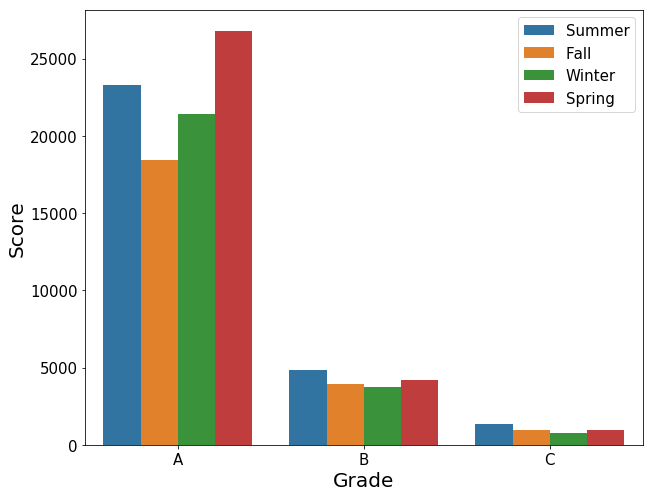

In [20]:
grades_by_seas = df[df['GRADE'].isin(['A','B', 'C'])]
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(x='GRADE', hue='SEASON', data=grades_by_seas, order=grades_by_seas['GRADE'].value_counts().index)
ax.set_ylabel('Score', fontsize=20)
ax.set_xlabel('Grade',fontsize=20)
ax.tick_params(labelsize=15)
ax = plt.legend(fontsize=15)

## Violations by Borough

We now take a look at the most common violations across the 5 boroughs. The most common violations in all boroughs are due to facility amenities,i.e., the structure of the facility was not appropriate. Facility amenities seem to be an issue to restaurants in Staten Island. The 2nd most common violation is due to the presence of Animals (mice, rats, coackroaches etc.). Bronx seem to have an issue with the latter as it shoows a higher percentage compared to other boroughs.

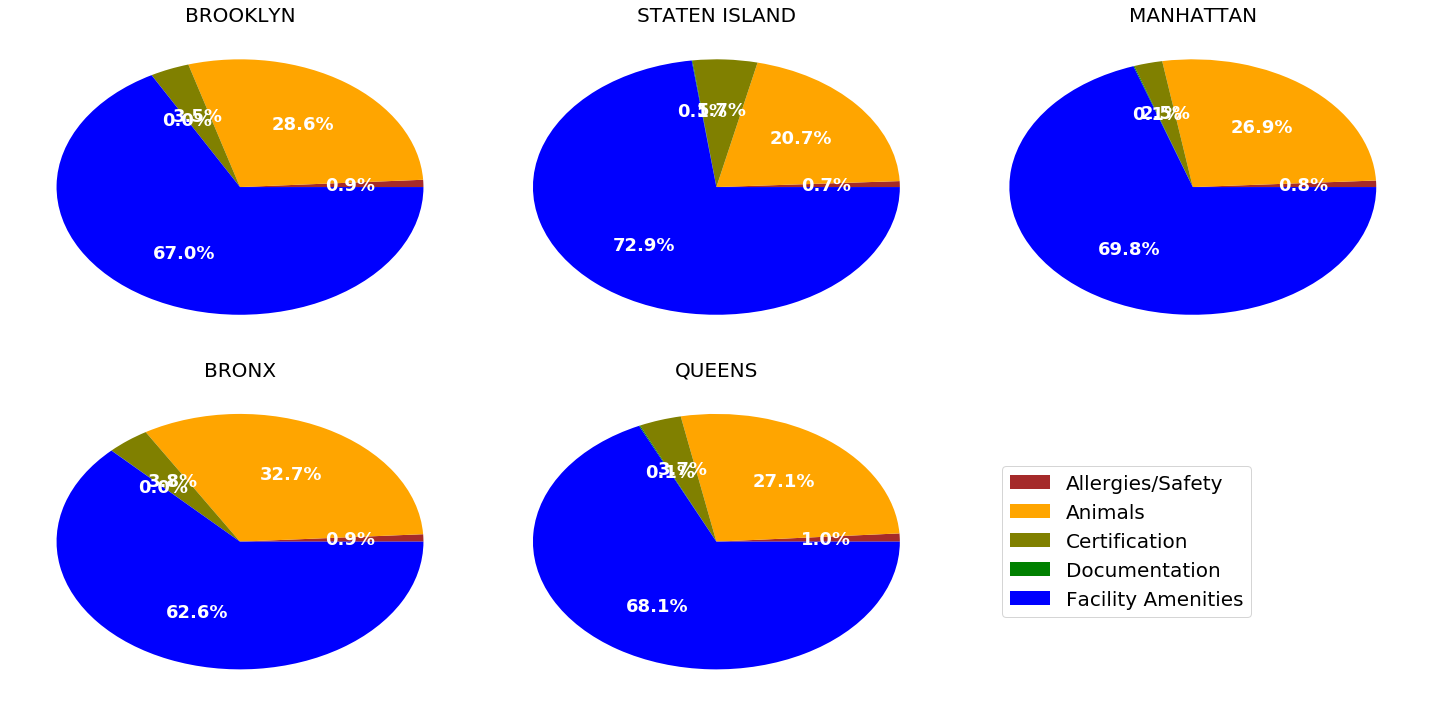

In [21]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

boros_list = df['BORO'].unique()
fig = plt.figure(figsize=(20,10))
graph = 1

for boro in boros_list:
    violations = df[df['BORO'] == boro].groupby(by='VIOLATION TYPE', sort=True)['BORO'].count().head(5)
    violations_pct = violations.values/violations.sum()
    ax = fig.add_subplot(2,3,graph)
    ax, text, autotext = plt.pie(violations, autopct=lambda pct: func(pct, violations), colors=colors[:len(violations)], textprops=dict(color="w"))
    plt.title(boro, fontsize=20)
    plt.setp(autotext, size=18, weight='bold')
    graph += 1
    plt.tight_layout()

labels = [l for l in violations.keys()]
plt.legend(ax, labels, bbox_to_anchor=(1.1,0.5), loc="center left", fontsize=20)
plt.show()

## Violations by type of cuisine

The next step involves looking at the violations divided by the type of cuisine. It is interesting to note some patterns here. American and Italian restaurants have more violations due to food contamination, Chinese and Latin restuarants received more violations due to food improperly cooked or stored (Food Temperature) and also share a higher number of violations due to the presence of animals. 

In [22]:
violation_cuisine = df.loc[:,['CUISINE DESCRIPTION', 'VIOLATION TYPE']].dropna()

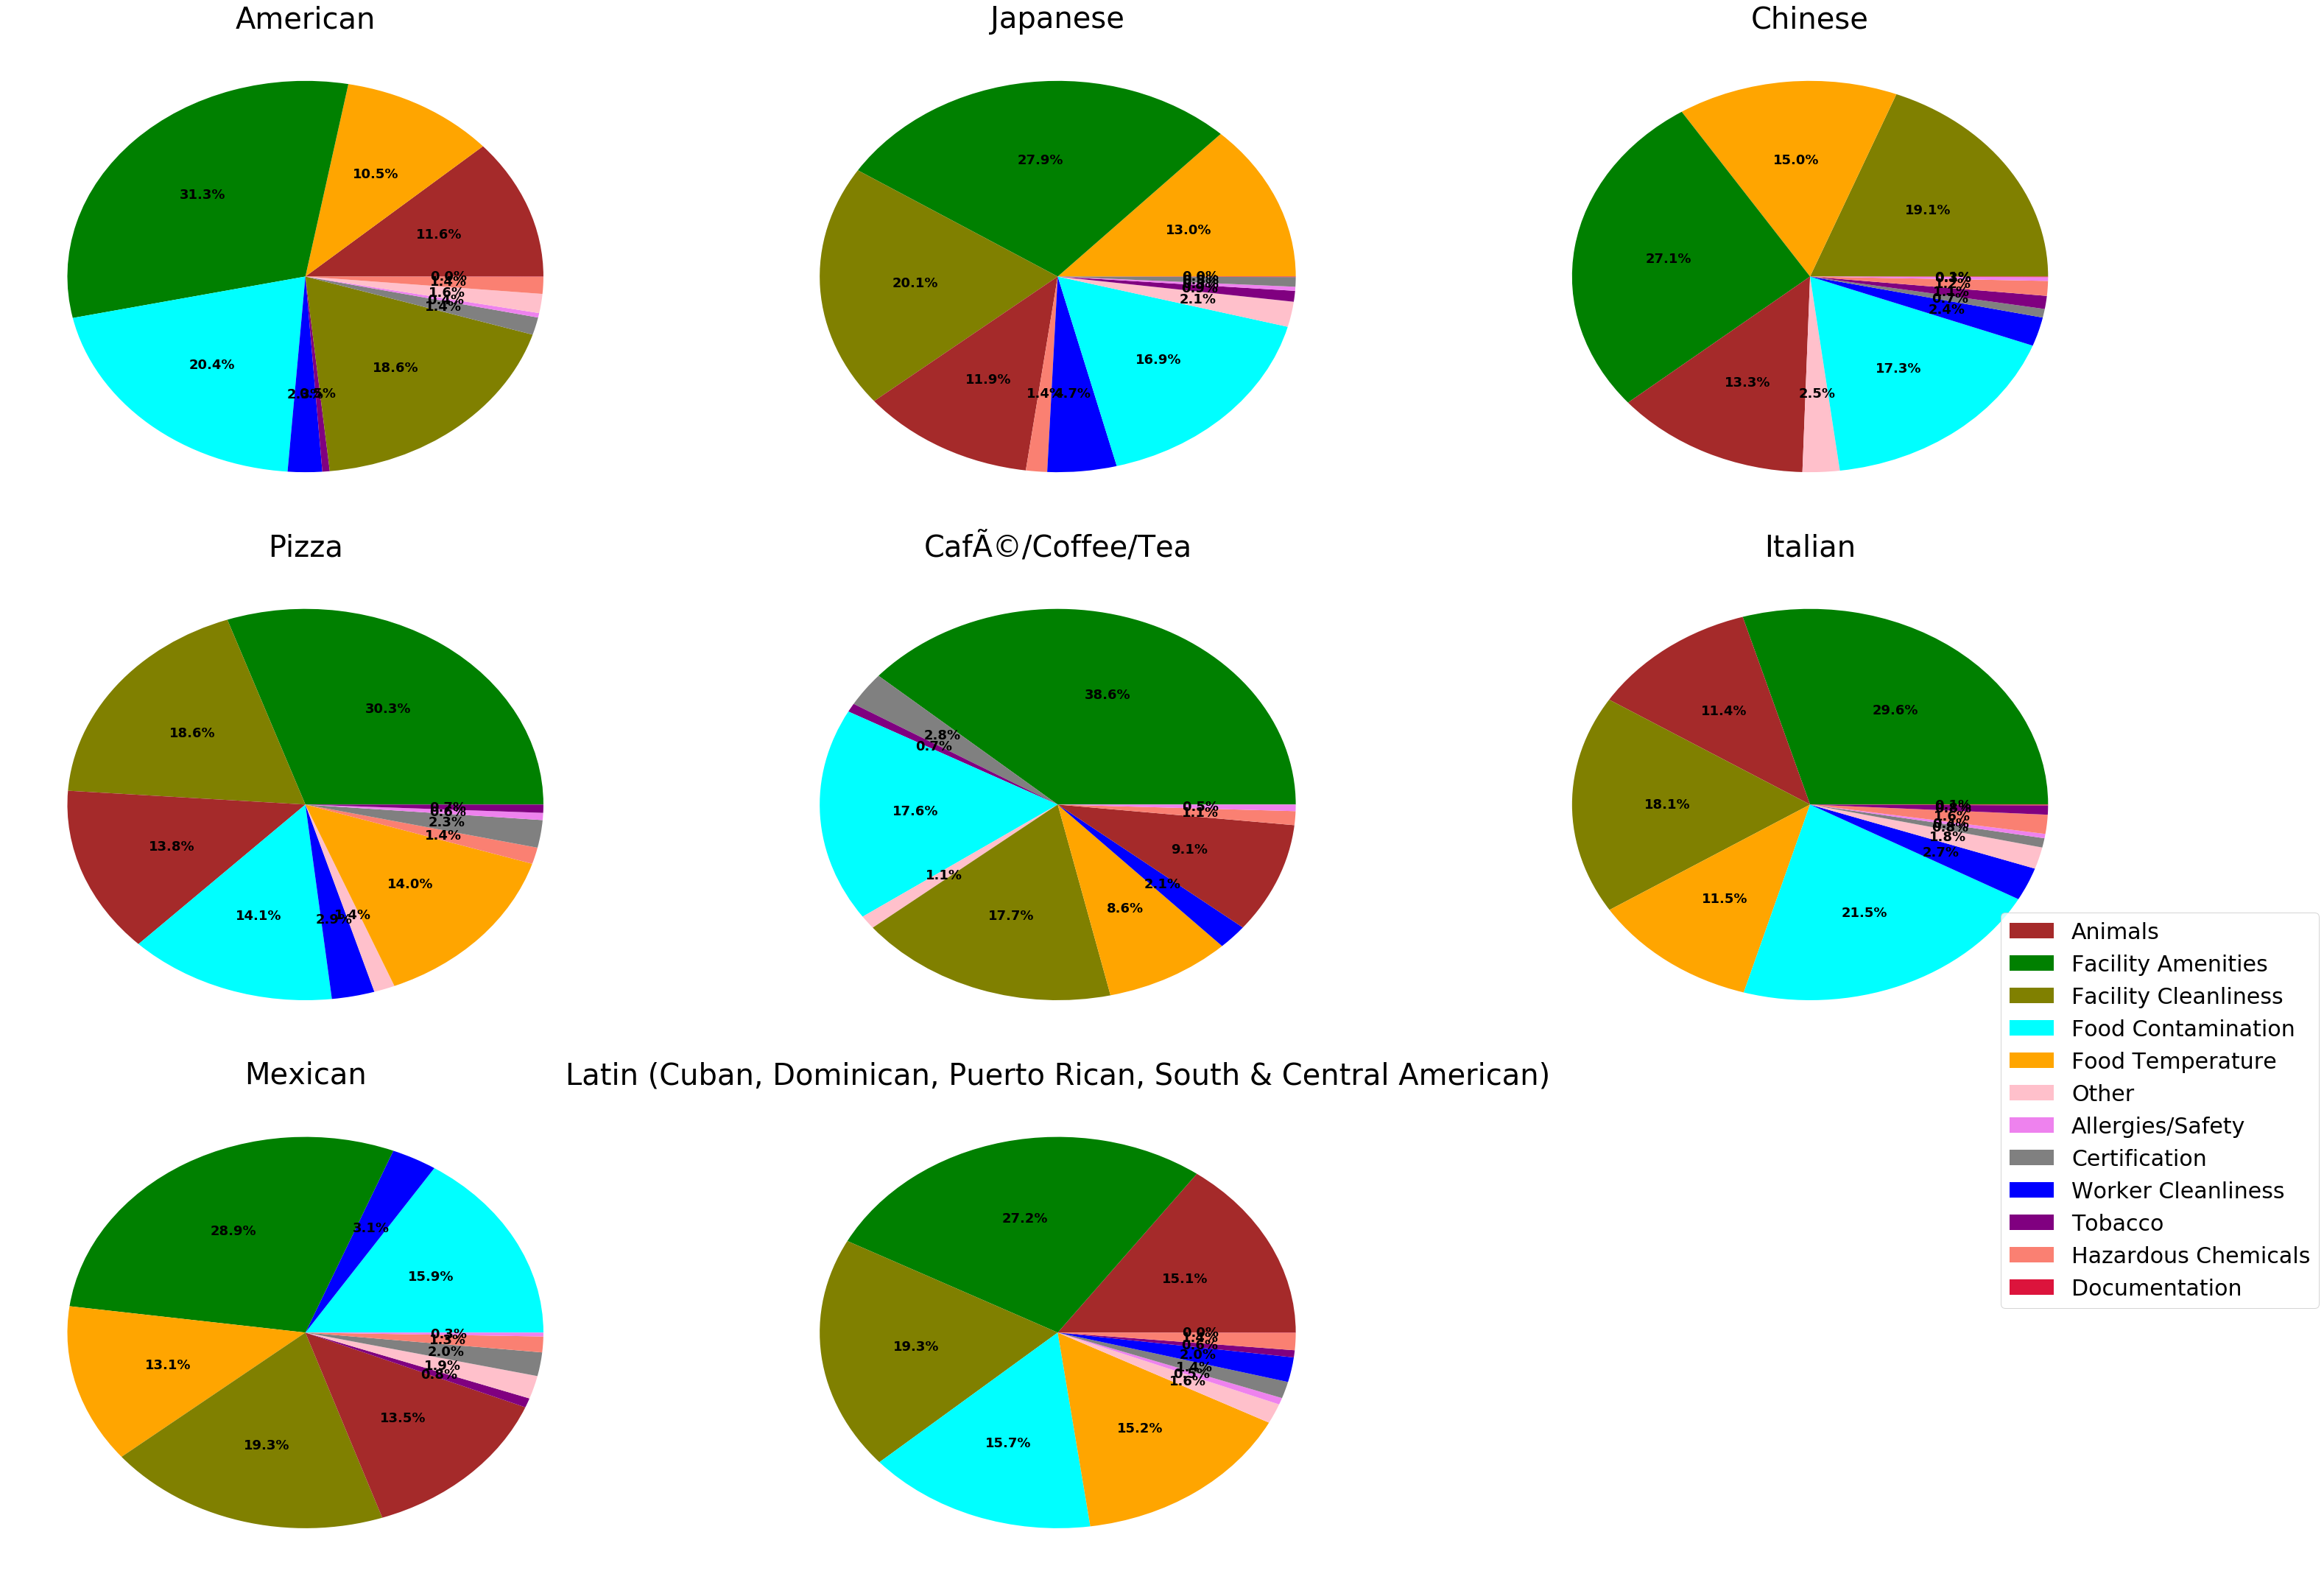

In [23]:
# violation_cuisine.head()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

fig = plt.figure(figsize=(40,30))
graph = 1


colors = ['brown', 'orange', 'olive', 'green', 'cyan', 'blue', 'purple', 'pink', 'gray', 'salmon', 'violet', 'crimson']
viol_color = {}

index = 0 
for i in violation_cuisine['VIOLATION TYPE'].unique():
    viol_color[i] = colors[index]
    index += 1

for i in violation_cuisine['CUISINE DESCRIPTION'].unique():
    viol = np.array([])
    labels = []
    types_cuis = violation_cuisine[violation_cuisine['CUISINE DESCRIPTION'] == i]
    for l in types_cuis['VIOLATION TYPE'].unique():
        if l != '':
            labels.append(l)
            viol= np.append(viol, len(types_cuis[types_cuis['VIOLATION TYPE'] == l]))
    ax = fig.add_subplot(3,3,graph)
    patches = plt.pie(viol, autopct=lambda pct: func(pct, viol), colors=[viol_color[c] for c in types_cuis['VIOLATION TYPE'].unique()])
    plt.title(i, fontsize=40)
    plt.setp(patches[2], size=18, weight='bold')
    graph += 1
    plt.tight_layout()
    
plt.legend(patches[0],labels, bbox_to_anchor=(1.1,0.3), loc="center right", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)
plt.savefig('cuis_types.png', bbox_inches='tight')
plt.show()

## Supervised Learning

In [61]:
df = df[df['GRADE'].isin(['A','B', 'C'])]
dt = df.loc[:, ["CUISINE DESCRIPTION", "INSPECTION TYPE", "MONTH", "GRADE"]]
dt = dt.sample(frac=1).reset_index(drop=True) # Shuffle the samples to increase randomness.
dt = dt.dropna()
Y = dt['GRADE']
X = dt.drop(dt.columns[-1], axis=1)

In [62]:
X.head()

,CUISINE DESCRIPTION,INSPECTION TYPE,MONTH
0,American,Cycle Inspection / Re-inspection,12
1,Chinese,Pre-permit (Operational) / Re-inspection,8
2,Chinese,Cycle Inspection / Re-inspection,6
3,Pizza,Cycle Inspection / Re-inspection,8
4,Italian,Cycle Inspection / Re-inspection,2


In [63]:
Y.head()

0    A
1    C
2    A
3    A
4    A
Name: GRADE, dtype: object

In [64]:
from sklearn.preprocessing import LabelEncoder
for col in X.columns[:]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [65]:
#Supervised Method with Kmeans to predict GRADE

from sklearn.cluster import KMeans
import numpy as np
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=42)

In [66]:
y_km = km.fit_predict(X)
labels = np.unique(y_km)
print(labels)

[0 1 2]


In [67]:
from collections import Counter
cl_map = dict()
for i in range(len(labels)):
    counter = Counter(Y[y_km ==i])
    cl_map[i] = counter.most_common(1)[0][0]
y_km_class = [cl_map[i] for i in y_km]
y_km_class = np.asarray(y_km_class)

In [68]:
y_km_class[y_km_class!=Y]='Wrong'

In [69]:
dt = dt.assign(pred_class=y_km_class)
dt.head()


,CUISINE DESCRIPTION,INSPECTION TYPE,MONTH,GRADE,pred_class
0,American,Cycle Inspection / Re-inspection,12,A,A
1,Chinese,Pre-permit (Operational) / Re-inspection,8,C,W
2,Chinese,Cycle Inspection / Re-inspection,6,A,A
3,Pizza,Cycle Inspection / Re-inspection,8,A,A
4,Italian,Cycle Inspection / Re-inspection,2,A,A


In [70]:
dt['pred_class'].value_counts()

A    89943
W    20772
Name: pred_class, dtype: int64

In [71]:
Accuracy_KMean = print(154193/(35158 + 154193))

0.8143236634609798


In [72]:
#Supervised Method with Logistic Regression topredict GRADE

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[26993    10     0]
 [ 4964     3     0]
 [ 1244     1     0]]


In [75]:
# Supervised Method with Decision tree to predict GRADE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 83036 samples in the training dataset
There are 27679 samples in the testing dataset
Each sample has 3 features


In [76]:
Y = dt[['GRADE']]

from sklearn import tree
estimator = tree.DecisionTreeClassifier(criterion="entropy")

In [77]:
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
y_predicted_train = estimator.predict(X_train)
accuracy_train = np.mean(y_train == y_predicted_train) * 100
print("The accuracy on training set is {0:.1f}%".format(accuracy_train))

The accuracy on training set is 81.5%


In [79]:
y_predicted_test = estimator.predict(X_test)
accuracy_test = np.mean(y_test == y_predicted_test) * 100
print("The accuracy on test set is {0:.1f}%".format(accuracy_test))

The accuracy on test set is 81.6%


In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predicted_test))

[[22498    17     0]
 [ 4094    27     0]
 [  973     5    65]]


In [81]:
avg_scores = []
# all_scores = []
# parameter_values = [10**exp for exp in np.arange(-2.0,0.0, 0.25)]
#parameter_values = np.arange(0,1, 0.05)
parameter_values = np.arange(1,10)
for hp in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy"
#                                            , min_impurity_decrease = hp
                                            , max_depth = hp
                                           )
    estimator.fit(X_train, y_train)
    y_predicted = estimator.predict(X_test)
    score = np.mean(y_test == y_predicted) * 100 # compute the matches between prediction and true classes
#    avg_scores.append(np.mean(scores))
    avg_scores.append(score)
#    all_scores.append(scores)

Text(0,0.5,'accuracy')

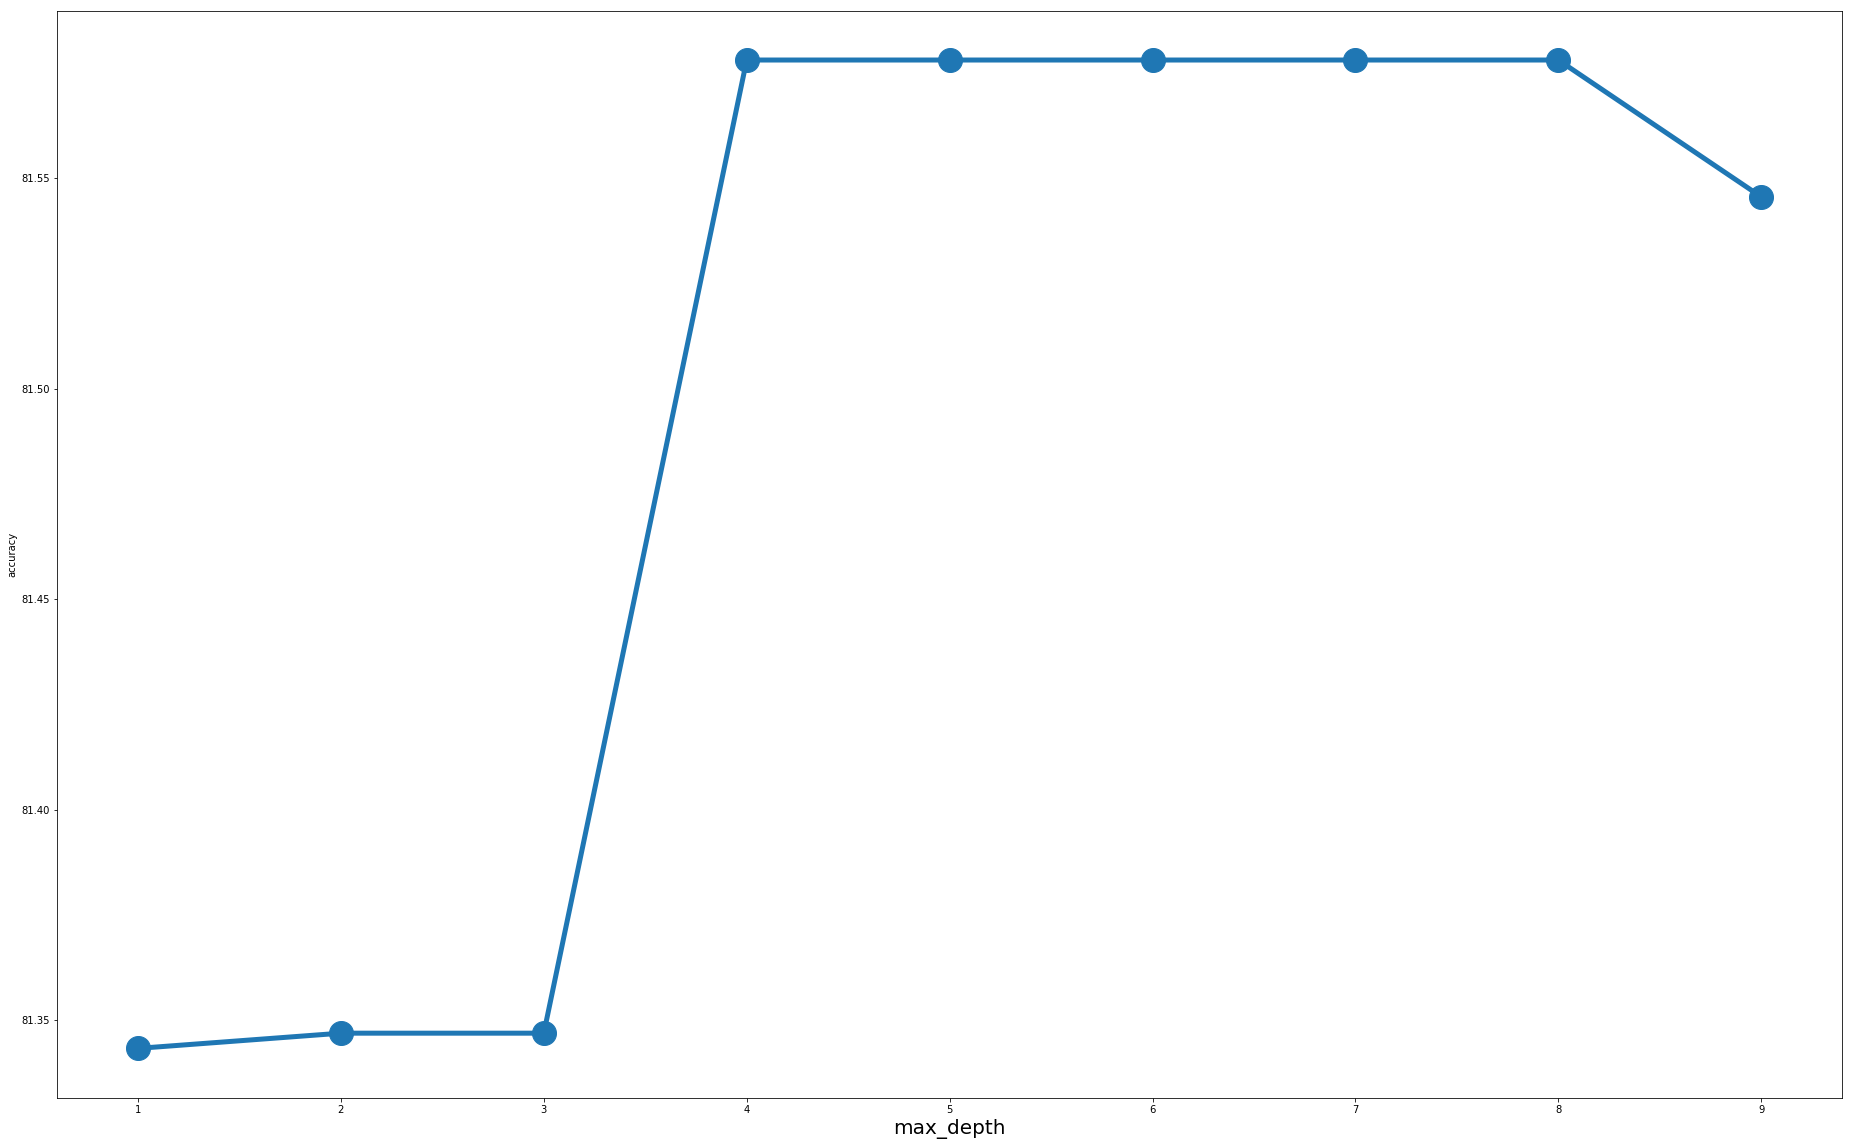

In [82]:
from matplotlib import pyplot as plt
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
plt.xlabel('max_depth', fontsize=20)
plt.ylabel('accuracy')
#plt.semilogx(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])

In [90]:
estimator = tree.DecisionTreeClassifier(criterion="entropy"
#                                            , min_impurity_decrease = parameter_values[np.argmax(avg_scores)]
#                                            , min_samples_leaf = 2
                                        , max_depth = 4
                                       )
estimator.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:

import graphviz 
dot_data = tree.export_graphviz(estimator, out_file=None,
                                feature_names=X.keys(),
                                class_names=np.unique(Y),
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

TypeError: must be str, not numpy.int64

In [ ]:
y_predicted_test = estimator.predict(X_test)
accuracy_test = np.mean(y_test == y_predicted_test) * 100
print("The accuracy on test set is {0:.1f}%".format(accuracy_test))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predicted_test))

In [ ]:
#Classification method with Random forest to predict GRADE

Y = dt[['GRADE']]
from sklearn.preprocessing import LabelEncoder
for col in Y.columns[:]:
    le = LabelEncoder()
    Y[col] = le.fit_transform(Y[col])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=14)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred1=clf.predict(X_train)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred))

In [92]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Training set accuracy
print("Accuracy training set:",metrics.accuracy_score(y_train, y_pred1))

NameError: name 'y_pred1' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
Accuracy = ('LR ACC ', 'DT ACC', 'RF ACC', 'KM ACC')
performance = [0.82, 0.818, 0.815, 0.814]
y_pos = performance
 
plt.bar(Accuracy, performance, align='center', alpha=0.5)
plt.xticks(Accuracy)
plt.ylabel('Level of Accuracy')
plt.title('Supervised methods')
plt.ylim((0.8,0.83))

Next we try to predict the grade each restaurant received using a Logistic Regression.

In [24]:
dt = df.loc[:, ["CUISINE DESCRIPTION", "INSPECTION TYPE", "MONTH", "VIOLATION CODE", "GRADE"]]
#dt = grades
dt = dt.sample(frac=1).reset_index(drop=True) # Shuffle the samples to increase randomness.
dt = dt.dropna()
Y = dt['GRADE']
#dt.drop(labels='GRADE')
X = dt.drop(dt.columns[-1], axis=1)

In [25]:
X.head()

,CUISINE DESCRIPTION,INSPECTION TYPE,MONTH,VIOLATION CODE
0,American,Cycle Inspection / Re-inspection,8,02G
1,American,Cycle Inspection / Re-inspection,3,10F
2,American,Cycle Inspection / Initial Inspection,3,06C
3,American,Cycle Inspection / Re-inspection,6,10F
4,"Latin (Cuban, Dominican, Puerto Rican, South &...",Cycle Inspection / Initial Inspection,5,09C


In [26]:
# Transform the columns into numerical attributes
from sklearn.preprocessing import LabelEncoder
for col in X.columns[:]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
Y = le.fit_transform(Y)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=14)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
print('The training set contains %d elements and the test set contains %d elements.' %(len(X_train), len(X_test)))

The training set contains 84441 elements and the test set contains 28147 elements.


In [29]:
y_pred_train = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, Y_train)))

Accuracy of logistic regression classifier on training set: 0.80


In [30]:
y_pred_test = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.79


The logistic regression is capable of correctly predicting the grade of 80% of the training set and 79% of the test set. Next we print the confusion matrix to see the distribution on elements not correctly classifed.

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred_test))

[[22220   229     0     0     0]
 [ 4143   110     0     0     0]
 [  973    29     0     0     0]
 [  148     2     0     0     0]
 [  289     4     0     0     0]]


### Decision Tree classifier on the grade

In the next step we use another supervised learning algorithm (Decision Tree), to predict the grades each restaurant will get. We have changed the sizes of the training and test sets from the logistic regression.

We tested the decision tree with different depth levels to avoid possible overfitting.

In [32]:
from sklearn import tree
avg_scores = []
parameter_values = np.arange(1,10)
for hp in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy"
#                                            , min_impurity_decrease = hp
                                            , max_depth = hp
                                           )
    estimator.fit(X_train, Y_train)
    y_predicted = estimator.predict(X_test)
    score = np.mean(Y_test == y_predicted) * 100 # compute the matches between prediction and true classes
    avg_scores.append(score)

The plot shows that the accuracy changes little as the depth of the tree is increased. 

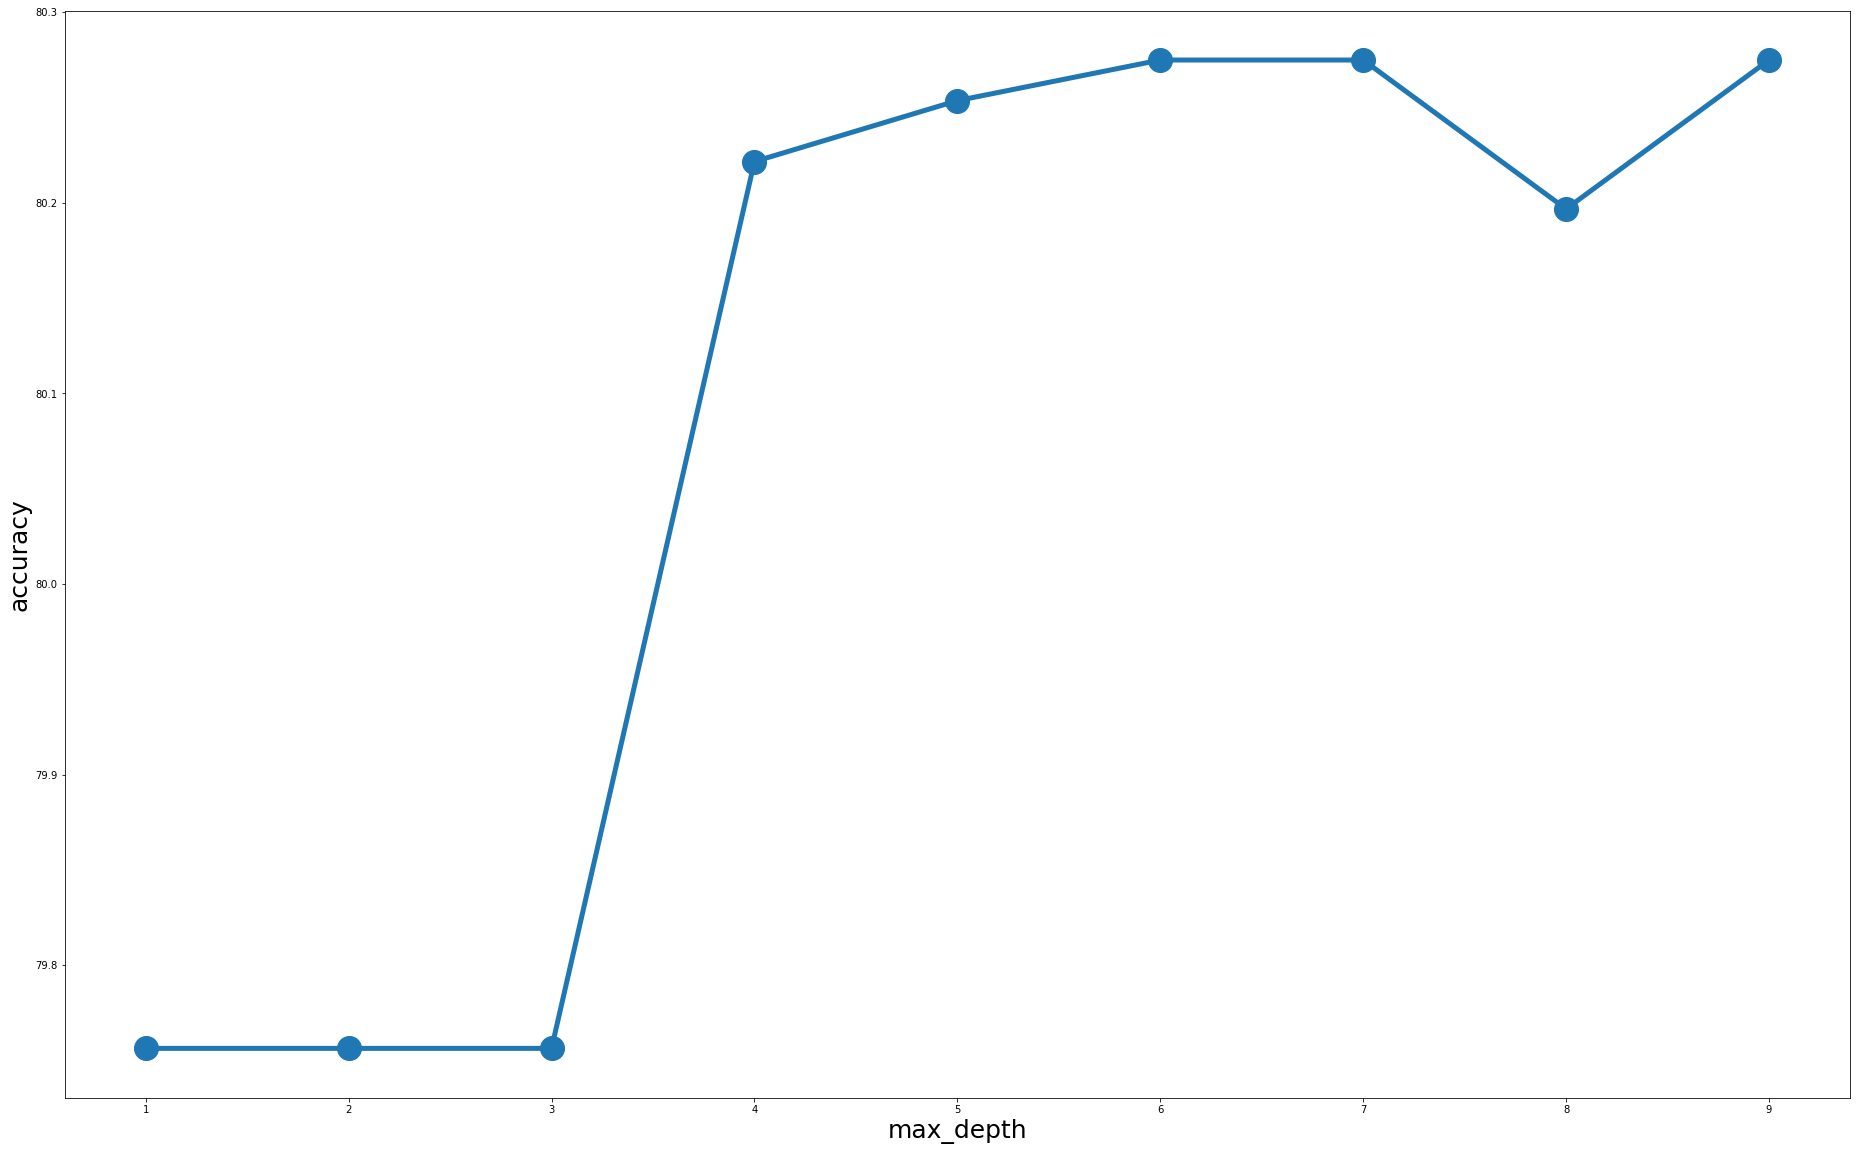

In [33]:
plt.figure(figsize=(32,20))
ax = plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
plt.xlabel('max_depth', fontsize=25)
plt.ylabel('accuracy', fontsize=25)
#ax.tick_params(labelsize=15)
ax = plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 84441 samples in the training dataset
There are 28147 samples in the testing dataset
Each sample has 4 features


After testing the different depth levels of the tree, it was decided to use 4

In [35]:
# from sklearn import tree
estimator = tree.DecisionTreeClassifier(criterion="entropy",
                                       max_depth=4)

In [36]:
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
y_predicted_train = estimator.predict(X_train)
y_train1 = np.array(y_train)
accuracy_train = np.mean(y_train1 == y_predicted_train) * 100
print("The accuracy on training set is {0:.1f}%".format(accuracy_train))

The accuracy on training set is 80.4%


In [38]:
y_predicted_test = estimator.predict(X_test)
accuracy_test = np.mean(y_test == y_predicted_test) * 100
print("The accuracy on test set is {0:.1f}%".format(accuracy_test))

The accuracy on test set is 80.4%


Confusion matrix for the tree classifier with depth level of 4

In [39]:
print(confusion_matrix(y_test, y_predicted_test))

[[22468     0     0     0     0     0]
 [ 4215     0     0     0     0     0]
 [  956     0     1     0    59     0]
 [    1     0     0     0     0     0]
 [   23     0     0     0   148     0]
 [  251     0     0     0    25     0]]


### Random Forest classifier

In [40]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=14)

In [41]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test) 

In [42]:
print("Training set Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Training set Accuracy: 0.8262337016378299


In [43]:
print("Test set Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Test set Accuracy: 0.7913454364585923


### Supervised KMeans classifier

In [44]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=42)
y_km = km.fit_predict(X)
labels = np.unique(y_km)

In [45]:
y_correct = [Y == y_km]

In [46]:
y_correct = [i for p in y_correct for i in p]
y_correct = np.asarray(y_correct)

In [47]:
print('The accuracy of the KMeans set on the grade is {0:.1f}%'.format(np.sum(y_correct)*100/len(y_correct)))

The accuracy of the KMeans set on the grade is 18.1%
